In [2]:
#Imporing of python libraries to work with data

# To work with Dataframe
import pandas as pd

# To work with Array
import numpy as np

# Decompress the file
import gzip

# For Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# For dealing with Datetime
from datetime import datetime

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

# Since metadata is large hence for Large dataset
import dask.bag as db

In [65]:
# Reading merged music reviews data 
dataset = pd.read_csv('C:/Users/Hassa/OneDrive/Documents/CIND820/amazonMusicReviw/reviewscombined.CSV', sep = ",")

In [66]:
dataset.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                              Jake  [13, 14]   
2                     Rick Bennette "Rick Bennette"    [1, 1]   
3                         RustyBill "Sunday Rocker"    [0, 0]   
4                                     SEAN MASLANKA    [0, 0]   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...        5   
1  The product does exactly as it should and is q...        5   
2  The primary job of this device is to block the...        5   
3  Nice windscreen protects my MXL mic and preven...        5   
4  This pop filter is great. It looks and perform...        5   

                                 summary  unixReviewTime   reviewTime  \
0                                   good      1393545600  02 28, 2014   
1                                   Jake      1363392000  03 16, 2013   
2                   It Does The Job Well      1377648000  08 28, 2013   
3          GOOD WINDSCREEN FOR THE MONEY      1392336000  02 14, 2014   
4  No more pops when I record my vocals.      1392940800  02 21, 2014   

                                               title  price  \
0  niceEshop Studio Microphone Mic Wind Screen Po...   7.09   
1  niceEshop Studio Microphone Mic Wind Screen Po...   7.09   
2  niceEshop Studio Microphone Mic Wind Screen Po...   7.09   
3  niceEshop Studio Microphone Mic Wind Screen Po...   7.09   
4  niceEshop Studio Microphone Mic Wind Screen Po...   7.09   

                                               imUrl  \
0  http://ecx.images-amazon.com/images/I/510D2cVp...   
1  http://ecx.images-amazon.com/images/I/510D2cVp...   
2  http://ecx.images-amazon.com/images/I/510D2cVp...   
3  http://ecx.images-amazon.com/images/I/510D2cVp...   
4  http://ecx.images-amazon.com/images/I/510D2cVp...   

                       salesRank  \
0  {'Musical Instruments': 2880}   
1  {'Musical Instruments': 2880}   
2  {'Musical Instruments': 2880}   
3  {'Musical Instruments': 2880}   
4  {'Musical Instruments': 2880}   

                                          categories  \
0  [['Musical Instruments', 'Microphones & Access...   
1  [['Musical Instruments', 'Microphones & Access...   
2  [['Musical Instruments', 'Microphones & Access...   
3  [['Musical Instruments', 'Microphones & Access...   
4  [['Musical Instruments', 'Microphones & Access...   

                                             related      brand  \
0  {'also_bought': ['B009D015TI', 'B004QJREXM', '...  niceEshop   
1  {'also_bought': ['B009D015TI', 'B004QJREXM', '...  niceEshop   
2  {'also_bought': ['B009D015TI', 'B004QJREXM', '...  niceEshop   
3  {'also_bought': ['B009D015TI', 'B004QJREXM', '...  niceEshop   
4  {'also_bought': ['B009D015TI', 'B004QJREXM', '...  niceEshop   

                                         description  
0  New generic Studio Microphone Mic Wind Screen ...  
1  New generic Studio Microphone Mic Wind Screen ...  
2  New generic Studio Microphone Mic Wind Screen ...  
3  New generic Studio Microphone Mic Wind Screen ...  
4  New generic Studio Microphone Mic Wind Screen ...

In [67]:
dataset.shape

(10261, 17)

In [68]:
#Looking at all the attributes of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  int64  
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
 9   title           10237 non-null  object 
 10  price           10247 non-null  float64
 11  imUrl           10247 non-null  object 
 12  salesRank       10225 non-null  object 
 13  categories      10261 non-null  object 
 14  related         10247 non-null  object 
 15  brand           9105 non-null   object 
 16  description     7412 non-null   object 
dtypes: float64(1), int64(2), object

In [69]:
#Checking for null values in the dataset 
dataset.isnull().sum()

reviewerID           0
asin                 0
reviewerName        27
helpful              0
reviewText           7
overall              0
summary              0
unixReviewTime       0
reviewTime           0
title               24
price               14
imUrl               14
salesRank           36
categories           0
related             14
brand             1156
description       2849
dtype: int64

In [70]:
#Preprocessing of Data - Step 1
# Dropping columns which are not required for analysis 
dataset.drop(['reviewerName','salesRank','related','description'], axis=1, inplace= True)

In [71]:
#Pre Processing of Data - Step 1 
# Droping null values of title attribute 
datasetV1 = dataset.dropna(subset =['title'])

In [72]:
#Looking at the null values again in new dataframe 
datasetV1.isnull().sum()

reviewerID           0
asin                 0
helpful              0
reviewText           7
overall              0
summary              0
unixReviewTime       0
reviewTime           0
title                0
price                0
imUrl                0
categories           0
brand             1132
dtype: int64

In [41]:
datasetV1['title'].isnull().sum()

0

In [73]:
#Dropping null values from review text 
datasetV1 = datasetV1.dropna(subset= ['reviewText'])

In [53]:
datasetV1.isna().sum()

reviewerID           0
asin                 0
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
title                0
price                0
imUrl                0
categories           0
brand             1132
dtype: int64

In [121]:
#Final Checking for null values 
datasetV2.isna().sum()

reviewerID        0
asin              0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
title             0
price             0
imUrl             0
categories        0
brand             0
Full Review       0
dtype: int64

In [122]:
datasetV1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10230 entries, 0 to 10260
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10230 non-null  object 
 1   asin            10230 non-null  object 
 2   helpful         10230 non-null  object 
 3   reviewText      10230 non-null  object 
 4   overall         10230 non-null  int64  
 5   summary         10230 non-null  object 
 6   unixReviewTime  10230 non-null  int64  
 7   reviewTime      10230 non-null  object 
 8   title           10230 non-null  object 
 9   price           10230 non-null  float64
 10  imUrl           10230 non-null  object 
 11  categories      10230 non-null  object 
 12  brand           9098 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1.4+ MB


In [123]:
#Final Step dropping all the nulls from data fram 
datasetV2 = datasetV1.dropna()

In [124]:
#Final checking all nulls are dropped. 
datasetV2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9098 entries, 0 to 10260
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      9098 non-null   object 
 1   asin            9098 non-null   object 
 2   helpful         9098 non-null   object 
 3   reviewText      9098 non-null   object 
 4   overall         9098 non-null   int64  
 5   summary         9098 non-null   object 
 6   unixReviewTime  9098 non-null   int64  
 7   reviewTime      9098 non-null   object 
 8   title           9098 non-null   object 
 9   price           9098 non-null   float64
 10  imUrl           9098 non-null   object 
 11  categories      9098 non-null   object 
 12  brand           9098 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 995.1+ KB


In [82]:
#Adding new column Full Review to data frame by concatenating review text and summary attributes
datasetV2['Full Review'] = datasetV2['reviewText'] +' '+datasetV2['summary']

In [86]:
# Checking example randomly select row 331 to check concatenate is working fine. 
print(datasetV2['Full Review'][331])
print(datasetV2['reviewText'][331])
print(datasetV2['summary'][331])

I love these strings.  I bought a set awhile back for my Ovation, but never used them.  Then I came into possession of an old Yamaha acoustic guitar which was pretty beat up and needed new strings.  I put these suckers on there and wow was I impressed.  Even that old beater guitar sounded great and played easily with these strings.  So... I bought another set for the Ovation this time! Sound great!
I love these strings.  I bought a set awhile back for my Ovation, but never used them.  Then I came into possession of an old Yamaha acoustic guitar which was pretty beat up and needed new strings.  I put these suckers on there and wow was I impressed.  Even that old beater guitar sounded great and played easily with these strings.  So... I bought another set for the Ovation this time!
Sound great!


In [125]:

# Writing updated data file to CSV. 
datasetV2.to_csv('C:/Users/Hassa/OneDrive/Documents/CIND820/amazonMusicReviw/reviewscombined_datasetV2.CSV', sep =',', encoding='utf-8', index= False)
    


In [6]:
dataframe = pd.read_csv('reviewscombined_datasetV2.CSV')

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9098 entries, 0 to 9097
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      9098 non-null   object 
 1   asin            9098 non-null   object 
 2   helpful         9098 non-null   object 
 3   reviewText      9098 non-null   object 
 4   overall         9098 non-null   int64  
 5   summary         9098 non-null   object 
 6   unixReviewTime  9098 non-null   int64  
 7   reviewTime      9098 non-null   object 
 8   title           9098 non-null   object 
 9   price           9098 non-null   float64
 10  imUrl           9098 non-null   object 
 11  categories      9098 non-null   object 
 12  brand           9098 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 924.1+ KB


In [8]:
dataframe['Full Review'] = dataframe[['summary', 'reviewText']].apply(lambda x: " ".join(str(y) for y in x if str(y) != 'nan'), axis = 1)
dataframe = dataframe.drop(['reviewText', 'summary'], axis = 1)
dataframe.head()

reviewerID        asin   helpful  overall  unixReviewTime   reviewTime  \
0  A2IBPI20UZIR0U  1384719342    [0, 0]        5      1393545600  02 28, 2014   
1  A14VAT5EAX3D9S  1384719342  [13, 14]        5      1363392000  03 16, 2013   
2  A195EZSQDW3E21  1384719342    [1, 1]        5      1377648000  08 28, 2013   
3  A2C00NNG1ZQQG2  1384719342    [0, 0]        5      1392336000  02 14, 2014   
4   A94QU4C90B1AX  1384719342    [0, 0]        5      1392940800  02 21, 2014   

                                               title  price  \
0  niceEshop Studio Microphone Mic Wind Screen Po...   7.09   
1  niceEshop Studio Microphone Mic Wind Screen Po...   7.09   
2  niceEshop Studio Microphone Mic Wind Screen Po...   7.09   
3  niceEshop Studio Microphone Mic Wind Screen Po...   7.09   
4  niceEshop Studio Microphone Mic Wind Screen Po...   7.09   

                                               imUrl  \
0  http://ecx.images-amazon.com/images/I/510D2cVp...   
1  http://ecx.images-amazon.com/images/I/510D2cVp...   
2  http://ecx.images-amazon.com/images/I/510D2cVp...   
3  http://ecx.images-amazon.com/images/I/510D2cVp...   
4  http://ecx.images-amazon.com/images/I/510D2cVp...   

                                          categories      brand  \
0  [['Musical Instruments', 'Microphones & Access...  niceEshop   
1  [['Musical Instruments', 'Microphones & Access...  niceEshop   
2  [['Musical Instruments', 'Microphones & Access...  niceEshop   
3  [['Musical Instruments', 'Microphones & Access...  niceEshop   
4  [['Musical Instruments', 'Microphones & Access...  niceEshop   

                                         Full Review  
0  good Not much to write about here, but it does...  
1  Jake The product does exactly as it should and...  
2  It Does The Job Well The primary job of this d...  
3  GOOD WINDSCREEN FOR THE MONEY Nice windscreen ...  
4  No more pops when I record my vocals. This pop...

In [9]:
#Classificaton of overall attribute into good and bad ratings 

goodrating = len(dataframe[dataframe['overall'] >= 3])
badrating = len(dataframe[dataframe['overall'] < 3])

print('Good ratings :{} reviews for music instruments'.format(goodrating) )
print('Bad ratings :{} reviews for music instruments'.format(badrating) )

Good ratings :8679 reviews for music instruments
Bad ratings :419 reviews for music instruments


In [10]:
#Application of ratings to the data frame and review of dataframe 
dataframe['Rating'] = dataframe['overall'].apply(lambda x: 'bad' if x < 3 else 'good')
dataframe.head()

reviewerID        asin   helpful  overall  unixReviewTime   reviewTime  \
0  A2IBPI20UZIR0U  1384719342    [0, 0]        5      1393545600  02 28, 2014   
1  A14VAT5EAX3D9S  1384719342  [13, 14]        5      1363392000  03 16, 2013   
2  A195EZSQDW3E21  1384719342    [1, 1]        5      1377648000  08 28, 2013   
3  A2C00NNG1ZQQG2  1384719342    [0, 0]        5      1392336000  02 14, 2014   
4   A94QU4C90B1AX  1384719342    [0, 0]        5      1392940800  02 21, 2014   

                                               title  price  \
0  niceEshop Studio Microphone Mic Wind Screen Po...   7.09   
1  niceEshop Studio Microphone Mic Wind Screen Po...   7.09   
2  niceEshop Studio Microphone Mic Wind Screen Po...   7.09   
3  niceEshop Studio Microphone Mic Wind Screen Po...   7.09   
4  niceEshop Studio Microphone Mic Wind Screen Po...   7.09   

                                               imUrl  \
0  http://ecx.images-amazon.com/images/I/510D2cVp...   
1  http://ecx.images-amazon.com/images/I/510D2cVp...   
2  http://ecx.images-amazon.com/images/I/510D2cVp...   
3  http://ecx.images-amazon.com/images/I/510D2cVp...   
4  http://ecx.images-amazon.com/images/I/510D2cVp...   

                                          categories      brand  \
0  [['Musical Instruments', 'Microphones & Access...  niceEshop   
1  [['Musical Instruments', 'Microphones & Access...  niceEshop   
2  [['Musical Instruments', 'Microphones & Access...  niceEshop   
3  [['Musical Instruments', 'Microphones & Access...  niceEshop   
4  [['Musical Instruments', 'Microphones & Access...  niceEshop   

                                         Full Review Rating  
0  good Not much to write about here, but it does...   good  
1  Jake The product does exactly as it should and...   good  
2  It Does The Job Well The primary job of this d...   good  
3  GOOD WINDSCREEN FOR THE MONEY Nice windscreen ...   good  
4  No more pops when I record my vocals. This pop...   good

In [11]:
# Checking of duplicate values based on reviewerID, unixReviewTuime and asin
dataframe[dataframe.duplicated(['reviewerID','unixReviewTime','asin'],keep= False)]
# No duplicates found 

Empty DataFrame
Columns: [reviewerID, asin, helpful, overall, unixReviewTime, reviewTime, title, price, imUrl, categories, brand, Full Review, Rating]
Index: []

In [12]:
# Converting Review Time attribuite of data frame into time attribute 
dataframe['time'] = dataframe.reviewTime.str.replace(',', "")
dataframe['time'] = pd.to_datetime(dataframe['time'], format = '%m %d %Y')

# Drop redundant 'reviewTime' column
dataframe = dataframe.drop('reviewTime', axis = 1)
dataframe.head()

reviewerID        asin   helpful  overall  unixReviewTime  \
0  A2IBPI20UZIR0U  1384719342    [0, 0]        5      1393545600   
1  A14VAT5EAX3D9S  1384719342  [13, 14]        5      1363392000   
2  A195EZSQDW3E21  1384719342    [1, 1]        5      1377648000   
3  A2C00NNG1ZQQG2  1384719342    [0, 0]        5      1392336000   
4   A94QU4C90B1AX  1384719342    [0, 0]        5      1392940800   

                                               title  price  \
0  niceEshop Studio Microphone Mic Wind Screen Po...   7.09   
1  niceEshop Studio Microphone Mic Wind Screen Po...   7.09   
2  niceEshop Studio Microphone Mic Wind Screen Po...   7.09   
3  niceEshop Studio Microphone Mic Wind Screen Po...   7.09   
4  niceEshop Studio Microphone Mic Wind Screen Po...   7.09   

                                               imUrl  \
0  http://ecx.images-amazon.com/images/I/510D2cVp...   
1  http://ecx.images-amazon.com/images/I/510D2cVp...   
2  http://ecx.images-amazon.com/images/I/510D2cVp...   
3  http://ecx.images-amazon.com/images/I/510D2cVp...   
4  http://ecx.images-amazon.com/images/I/510D2cVp...   

                                          categories      brand  \
0  [['Musical Instruments', 'Microphones & Access...  niceEshop   
1  [['Musical Instruments', 'Microphones & Access...  niceEshop   
2  [['Musical Instruments', 'Microphones & Access...  niceEshop   
3  [['Musical Instruments', 'Microphones & Access...  niceEshop   
4  [['Musical Instruments', 'Microphones & Access...  niceEshop   

                                         Full Review Rating       time  
0  good Not much to write about here, but it does...   good 2014-02-28  
1  Jake The product does exactly as it should and...   good 2013-03-16  
2  It Does The Job Well The primary job of this d...   good 2013-08-28  
3  GOOD WINDSCREEN FOR THE MONEY Nice windscreen ...   good 2014-02-14  
4  No more pops when I record my vocals. This pop...   good 2014-02-21

In [16]:
print("\n","=====Descriptive statistics========")

total = len(dataframe)
print("\n","Number of total reviews:",total)

print ("Number of unique reviewers: ",len(dataframe.reviewerID.unique()))
reviewer_prop = float(len(dataframe.reviewerID.unique())/total)

print ("Number of unique products: ", len(dataframe.asin.unique()))
product_prop = float(len(dataframe.asin.unique())/total)

print ("Number of unique brands: ", len(dataframe.brand.unique()))
print ("Average rating score: ",round(dataframe.overall.mean(),3))


 =====Descriptive statistics========

 Number of total reviews: 9098
Number of unique reviewers:  1429
Number of unique products:  794
Number of unique brands:  198
Average rating score:  4.481


In [18]:
print("\n","==Rating Attriburte stats")
print(dataframe['overall'].describe())

print("\n","==Price stats")
dataframe['price'].describe()


 ==Rating Attriburte stats
count    9098.000000
mean        4.480875
std         0.896488
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: overall, dtype: float64

 ==Price stats


count    9098.000000
mean       31.544366
std        51.265850
min         0.050000
25%         6.460000
50%        12.500000
75%        29.990000
max       599.000000
Name: price, dtype: float64

Text(0, 0.5, 'Number of Reviews')

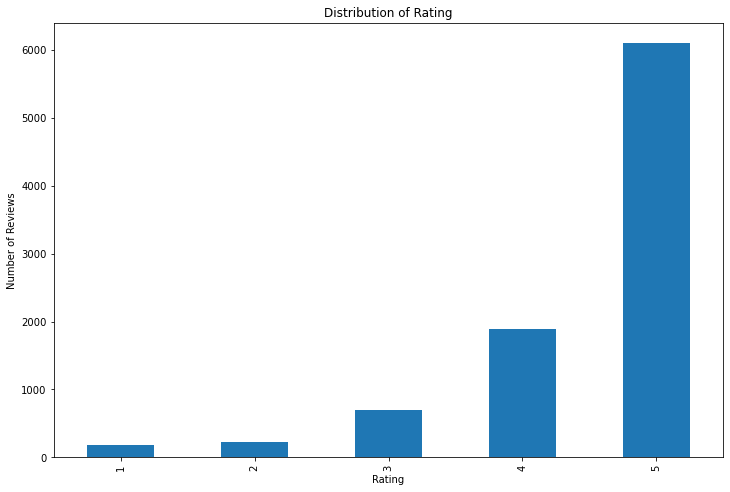

In [19]:
# Distribution of rating

plt.figure(figsize=(12,8))
# sns.countplot(df['Rating'])
dataframe['overall'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

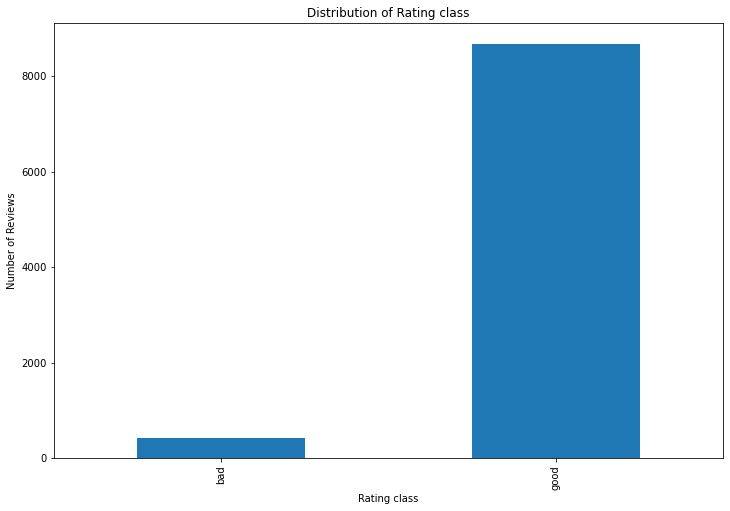

In [20]:
# Distribution of rating class

plt.figure(figsize=(12,8))

dataframe['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating class')
plt.xlabel('Rating class')
plt.ylabel('Number of Reviews')

In [21]:
#Distribution of rating overall

class_counts = dataframe.groupby('overall').size()
class_counts

overall
1     190
2     229
3     693
4    1890
5    6096
dtype: int64

In [22]:
# Statistics of non-numeric variables

# Number of unique customers
print('\nNumber of unique customers : {}'.format(len(dataframe['reviewerID'].unique())))
      
# Number of unique products
print('\nNumber of unique products : {}'.format(len(dataframe['asin'].unique())))
      
# Review number per unique customer
print('\nReview per customer: {}'.format((len(dataframe)/len(dataframe['reviewerID'].unique()))))      

# Review number per unique product 
print('\nReview per product: {}'.format((len(dataframe)/len(dataframe['asin'].unique()))))


Number of unique customers : 1429

Number of unique products : 794

Review per customer: 6.366689993002099

Review per product: 11.458438287153653


In [149]:
#The goal of this project is to classify the reviews into positive and negative sentiment. There are two main steps involved. First, we need to find a word embedding to convert a text into a numerical representation. Second, we fit the numerical representations of text to machine learning algorithms or deep learning architectures.
#Bag of words
#One common approach of word embedding is frequency based embedding such as Bag of Words (BoW) model. BoW model learns a vocubulary list from a given corpus and represents each document based on some counting methods of words. In this part, we will explore the model performance of using BoW with supervised learning algorithms. Here's the workflow in this part.

#Step 1 : Preprocess raw reviews to cleaned reviews
#Step 2 : Create BoW using CountVectorizer / Tfidfvectorizer in sklearn
#Step 3 : Transform review text to numerical representations (feature vectors)
#Step 4 : Fit feature vectors to supervised learning algorithm (eg. Naive Bayes, Logistic regression, etc.)
#Step 5 : Improve the model performance by GridSearch

In [25]:
# Text Pre Processing . Following packages are installed to convert data into cleaned data for next steps. 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import unicodedata
import contractions

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize 
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:

# calculate raw tokens in order to measure of cleaned tokens

from nltk.tokenize import word_tokenize
raw_tokens=len([w for t in (dataframe["Full Review"].apply(word_tokenize)) for w in t])
print('Number of raw tokens: {}'.format(raw_tokens))

Number of raw tokens: 980968


In [27]:
import contractions

In [28]:
expanded_words =[]
for words in dataframe['Full Review'].split():
    expanded_words.append(contractions.fix(word))
expanded_text = ' '.join(expanded_words)
    



AttributeError: 'Series' object has no attribute 'split'

In [154]:
import contractions

ModuleNotFoundError: No module named 'contractions'

In [59]:

import string
import fasttext

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
%matplotlib inline

In [30]:
pip install fasttext

     |████████████████████████████████| 68 kB 3.6 MB/s eta 0:00:011
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3258387 sha256=6f5fbaa0f970a1ec4d708514793a07181d84237f5a188c91b04a05acd5144c3b
  Stored in directory: /home/jovyan/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext
Note: you may need to restart the kernel to use updated packages.


In [32]:
dataframe['contracted'] = dataframe['Full Review'].apply(lambda x: [contractions.fix(word) for word in x.split()])
dataframe.head()

reviewerID        asin   helpful  overall  unixReviewTime  \
0  A2IBPI20UZIR0U  1384719342    [0, 0]        5      1393545600   
1  A14VAT5EAX3D9S  1384719342  [13, 14]        5      1363392000   
2  A195EZSQDW3E21  1384719342    [1, 1]        5      1377648000   
3  A2C00NNG1ZQQG2  1384719342    [0, 0]        5      1392336000   
4   A94QU4C90B1AX  1384719342    [0, 0]        5      1392940800   

                                                                                      title  \
0  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
1  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
2  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
3  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
4  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   

   price                                                          imUrl  \
0   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
1   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
2   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
3   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
4   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   

                                                                                          categories  \
0  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
1  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
2  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
3  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
4  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   

       brand  \
0  niceEshop   
1  niceEshop   
2  niceEshop   
3  niceEshop   
4  niceEshop   

                                                                                           Full Review  \
0  good Not much to write about here, but it does exactly what it's supposed to. filters out the po...   
1  Jake The product does exactly as it should and is quite affordable.I did not realized it was dou...   
2  It Does The Job Well The primary job of this device is to block the breath that would otherwise ...   
3  GOOD WINDSCREEN FOR THE MONEY Nice windscreen protects my MXL mic and prevents pops. Only thing ...   
4  No more pops when I record my vocals. This pop filter is great. It looks and performs like a stu...   

  Rating       time  \
0   good 2014-02-28   
1   good 2013-03-16   
2   good 2013-08-28   
3   good 2014-02-14   
4   good 2014-02-21   

                                                                                            contracted  
0  [good, Not, much, to, write, about, here,, but, it, does, exactly, what, it is, supposed, to., f...  
1  [Jake, The, product, does, exactly, as, it, should, and, is, quite, affordable.I, did, not, real...  
2  [It, Does, The, Job, Well, The, primary, job, of, this, device, is, to, block, the, breath, that...  
3  [GOOD, WINDSCREEN, FOR, THE, MONEY, Nice, windscreen, protects, my, MXL, mic, and, prevents, pop...  
4  [No, more, pops, when, I, record, my, vocals., This, pop, filter, is, great., It, looks, and, pe...

In [33]:
dataframe['Full_Review_str'] = [' '.join(map(str, l)) for l in dataframe['contracted']]
dataframe.head()

reviewerID        asin   helpful  overall  unixReviewTime  \
0  A2IBPI20UZIR0U  1384719342    [0, 0]        5      1393545600   
1  A14VAT5EAX3D9S  1384719342  [13, 14]        5      1363392000   
2  A195EZSQDW3E21  1384719342    [1, 1]        5      1377648000   
3  A2C00NNG1ZQQG2  1384719342    [0, 0]        5      1392336000   
4   A94QU4C90B1AX  1384719342    [0, 0]        5      1392940800   

                                                                                      title  \
0  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
1  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
2  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
3  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
4  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   

   price                                                          imUrl  \
0   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
1   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
2   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
3   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
4   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   

                                                                                          categories  \
0  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
1  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
2  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
3  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
4  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   

       brand  \
0  niceEshop   
1  niceEshop   
2  niceEshop   
3  niceEshop   
4  niceEshop   

                                                                                           Full Review  \
0  good Not much to write about here, but it does exactly what it's supposed to. filters out the po...   
1  Jake The product does exactly as it should and is quite affordable.I did not realized it was dou...   
2  It Does The Job Well The primary job of this device is to block the breath that would otherwise ...   
3  GOOD WINDSCREEN FOR THE MONEY Nice windscreen protects my MXL mic and prevents pops. Only thing ...   
4  No more pops when I record my vocals. This pop filter is great. It looks and performs like a stu...   

  Rating       time  \
0   good 2014-02-28   
1   good 2013-03-16   
2   good 2013-08-28   
3   good 2014-02-14   
4   good 2014-02-21   

                                                                                            contracted  \
0  [good, Not, much, to, write, about, here,, but, it, does, exactly, what, it is, supposed, to., f...   
1  [Jake, The, product, does, exactly, as, it, should, and, is, quite, affordable.I, did, not, real...   
2  [It, Does, The, Job, Well, The, primary, job, of, this, device, is, to, block, the, breath, that...   
3  [GOOD, WINDSCREEN, FOR, THE, MONEY, Nice, windscreen, protects, my, MXL, mic, and, prevents, pop...   
4  [No, more, pops, when, I, record, my, vocals., This, pop, filter, is, great., It, looks, and, pe...   

                                                                                       Full_Review_str  
0  good Not much to write about here, but it does exactly what it is supposed to. filters out the p...  
1  Jake The product does exactly as it should and is quite affordable.I did not realized it was dou...  
2  It Does The Job Well The primary job of this device is to block the breath that would otherwise ...  
3  GOOD WINDSCREEN FO

In [37]:
dataframe['tokenized'] = dataframe['Full_Review_str'].apply(word_tokenize)
dataframe.head()

reviewerID        asin   helpful  overall  unixReviewTime  \
0  A2IBPI20UZIR0U  1384719342    [0, 0]        5      1393545600   
1  A14VAT5EAX3D9S  1384719342  [13, 14]        5      1363392000   
2  A195EZSQDW3E21  1384719342    [1, 1]        5      1377648000   
3  A2C00NNG1ZQQG2  1384719342    [0, 0]        5      1392336000   
4   A94QU4C90B1AX  1384719342    [0, 0]        5      1392940800   

                                                                                      title  \
0  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
1  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
2  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
3  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
4  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   

   price                                                          imUrl  \
0   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
1   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
2   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
3   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
4   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   

                                                                                          categories  \
0  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
1  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
2  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
3  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
4  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   

       brand  \
0  niceEshop   
1  niceEshop   
2  niceEshop   
3  niceEshop   
4  niceEshop   

                                                                                           Full Review  \
0  good Not much to write about here, but it does exactly what it's supposed to. filters out the po...   
1  Jake The product does exactly as it should and is quite affordable.I did not realized it was dou...   
2  It Does The Job Well The primary job of this device is to block the breath that would otherwise ...   
3  GOOD WINDSCREEN FOR THE MONEY Nice windscreen protects my MXL mic and prevents pops. Only thing ...   
4  No more pops when I record my vocals. This pop filter is great. It looks and performs like a stu...   

  Rating       time  \
0   good 2014-02-28   
1   good 2013-03-16   
2   good 2013-08-28   
3   good 2014-02-14   
4   good 2014-02-21   

                                                                                            contracted  \
0  [good, Not, much, to, write, about, here,, but, it, does, exactly, what, it is, supposed, to., f...   
1  [Jake, The, product, does, exactly, as, it, should, and, is, quite, affordable.I, did, not, real...   
2  [It, Does, The, Job, Well, The, primary, job, of, this, device, is, to, block, the, breath, that...   
3  [GOOD, WINDSCREEN, FOR, THE, MONEY, Nice, windscreen, protects, my, MXL, mic, and, prevents, pop...   
4  [No, more, pops, when, I, record, my, vocals., This, pop, filter, is, great., It, looks, and, pe...   

                                                                                       Full_Review_str  \
0  good Not much to write about here, but it does exactly what it is supposed to. filters out the p...   
1  Jake The product does exactly as it should and is quite affordable.I did not realized it was dou...   
2  It Does The Job Well The primary job of this device is to block the breath that would otherwise ...   
3  GOOD WINDSCREE

In [38]:
dataframe['lower'] = dataframe['tokenized'].apply(lambda x: [word.lower() for word in x])
dataframe.head()

reviewerID        asin   helpful  overall  unixReviewTime  \
0  A2IBPI20UZIR0U  1384719342    [0, 0]        5      1393545600   
1  A14VAT5EAX3D9S  1384719342  [13, 14]        5      1363392000   
2  A195EZSQDW3E21  1384719342    [1, 1]        5      1377648000   
3  A2C00NNG1ZQQG2  1384719342    [0, 0]        5      1392336000   
4   A94QU4C90B1AX  1384719342    [0, 0]        5      1392940800   

                                                                                      title  \
0  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
1  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
2  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
3  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
4  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   

   price                                                          imUrl  \
0   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
1   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
2   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
3   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
4   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   

                                                                                          categories  \
0  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
1  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
2  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
3  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
4  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   

       brand  \
0  niceEshop   
1  niceEshop   
2  niceEshop   
3  niceEshop   
4  niceEshop   

                                                                                           Full Review  \
0  good Not much to write about here, but it does exactly what it's supposed to. filters out the po...   
1  Jake The product does exactly as it should and is quite affordable.I did not realized it was dou...   
2  It Does The Job Well The primary job of this device is to block the breath that would otherwise ...   
3  GOOD WINDSCREEN FOR THE MONEY Nice windscreen protects my MXL mic and prevents pops. Only thing ...   
4  No more pops when I record my vocals. This pop filter is great. It looks and performs like a stu...   

  Rating       time  \
0   good 2014-02-28   
1   good 2013-03-16   
2   good 2013-08-28   
3   good 2014-02-14   
4   good 2014-02-21   

                                                                                            contracted  \
0  [good, Not, much, to, write, about, here,, but, it, does, exactly, what, it is, supposed, to., f...   
1  [Jake, The, product, does, exactly, as, it, should, and, is, quite, affordable.I, did, not, real...   
2  [It, Does, The, Job, Well, The, primary, job, of, this, device, is, to, block, the, breath, that...   
3  [GOOD, WINDSCREEN, FOR, THE, MONEY, Nice, windscreen, protects, my, MXL, mic, and, prevents, pop...   
4  [No, more, pops, when, I, record, my, vocals., This, pop, filter, is, great., It, looks, and, pe...   

                                                                                       Full_Review_str  \
0  good Not much to write about here, but it does exactly what it is supposed to. filters out the p...   
1  Jake The product does exactly as it should and is quite affordable.I did not realized it was dou...   
2  It Does The Job Well The primary job of this device is to block the breath that would otherwise ...   
3  GOOD WINDSCREE

In [39]:
pretrained_model = "lid.176.bin" 
model = fasttext.load_model(pretrained_model)
langs = []
for sent in dataframe['Full_Review_str']:
    lang = model.predict(sent)[0]
    langs.append(str(lang)[11:13])
dataframe['langs'] = langs

In [40]:
dataframe.head()

reviewerID        asin   helpful  overall  unixReviewTime  \
0  A2IBPI20UZIR0U  1384719342    [0, 0]        5      1393545600   
1  A14VAT5EAX3D9S  1384719342  [13, 14]        5      1363392000   
2  A195EZSQDW3E21  1384719342    [1, 1]        5      1377648000   
3  A2C00NNG1ZQQG2  1384719342    [0, 0]        5      1392336000   
4   A94QU4C90B1AX  1384719342    [0, 0]        5      1392940800   

                                                                                      title  \
0  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
1  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
2  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
3  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
4  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   

   price                                                          imUrl  \
0   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
1   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
2   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
3   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
4   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   

                                                                                          categories  \
0  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
1  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
2  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
3  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
4  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   

       brand  \
0  niceEshop   
1  niceEshop   
2  niceEshop   
3  niceEshop   
4  niceEshop   

                                                                                           Full Review  \
0  good Not much to write about here, but it does exactly what it's supposed to. filters out the po...   
1  Jake The product does exactly as it should and is quite affordable.I did not realized it was dou...   
2  It Does The Job Well The primary job of this device is to block the breath that would otherwise ...   
3  GOOD WINDSCREEN FOR THE MONEY Nice windscreen protects my MXL mic and prevents pops. Only thing ...   
4  No more pops when I record my vocals. This pop filter is great. It looks and performs like a stu...   

  Rating       time  \
0   good 2014-02-28   
1   good 2013-03-16   
2   good 2013-08-28   
3   good 2014-02-14   
4   good 2014-02-21   

                                                                                            contracted  \
0  [good, Not, much, to, write, about, here,, but, it, does, exactly, what, it is, supposed, to., f...   
1  [Jake, The, product, does, exactly, as, it, should, and, is, quite, affordable.I, did, not, real...   
2  [It, Does, The, Job, Well, The, primary, job, of, this, device, is, to, block, the, breath, that...   
3  [GOOD, WINDSCREEN, FOR, THE, MONEY, Nice, windscreen, protects, my, MXL, mic, and, prevents, pop...   
4  [No, more, pops, when, I, record, my, vocals., This, pop, filter, is, great., It, looks, and, pe...   

                                                                                       Full_Review_str  \
0  good Not much to write about here, but it does exactly what it is supposed to. filters out the p...   
1  Jake The product does exactly as it should and is quite affordable.I did not realized it was dou...   
2  It Does The Job Well The primary job of this device is to block the breath that would otherwise ...   
3  GOOD WINDSCREE

In [43]:
dataframe.groupby('langs').size()

langs
en    9093
es       5
dtype: int64

In [53]:
esrows = dataframe[dataframe['langs']== 'es'].index
dataframe.drop(esrows, inplace = True)

In [54]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9093 entries, 0 to 9097
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   reviewerID       9093 non-null   object        
 1   asin             9093 non-null   object        
 2   helpful          9093 non-null   object        
 3   overall          9093 non-null   int64         
 4   unixReviewTime   9093 non-null   int64         
 5   title            9093 non-null   object        
 6   price            9093 non-null   float64       
 7   imUrl            9093 non-null   object        
 8   categories       9093 non-null   object        
 9   brand            9093 non-null   object        
 10  Full Review      9093 non-null   object        
 11  Rating           9093 non-null   object        
 12  time             9093 non-null   datetime64[ns]
 13  contracted       9093 non-null   object        
 14  Full_Review_str  9093 non-null   object 

In [55]:
dataframe.groupby('langs').size()

langs
en    9093
dtype: int64

In [56]:
punc = string.punctuation
dataframe['no_punc'] = dataframe['lower'].apply(lambda x: [word for word in x if word not in punc])
dataframe.head()

reviewerID        asin   helpful  overall  unixReviewTime  \
0  A2IBPI20UZIR0U  1384719342    [0, 0]        5      1393545600   
1  A14VAT5EAX3D9S  1384719342  [13, 14]        5      1363392000   
2  A195EZSQDW3E21  1384719342    [1, 1]        5      1377648000   
3  A2C00NNG1ZQQG2  1384719342    [0, 0]        5      1392336000   
4   A94QU4C90B1AX  1384719342    [0, 0]        5      1392940800   

                                                                                      title  \
0  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
1  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
2  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
3  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
4  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   

   price                                                          imUrl  \
0   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
1   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
2   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
3   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
4   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   

                                                                                          categories  \
0  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
1  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
2  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
3  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
4  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   

       brand  \
0  niceEshop   
1  niceEshop   
2  niceEshop   
3  niceEshop   
4  niceEshop   

                                                                                           Full Review  \
0  good Not much to write about here, but it does exactly what it's supposed to. filters out the po...   
1  Jake The product does exactly as it should and is quite affordable.I did not realized it was dou...   
2  It Does The Job Well The primary job of this device is to block the breath that would otherwise ...   
3  GOOD WINDSCREEN FOR THE MONEY Nice windscreen protects my MXL mic and prevents pops. Only thing ...   
4  No more pops when I record my vocals. This pop filter is great. It looks and performs like a stu...   

  Rating       time  \
0   good 2014-02-28   
1   good 2013-03-16   
2   good 2013-08-28   
3   good 2014-02-14   
4   good 2014-02-21   

                                                                                            contracted  \
0  [good, Not, much, to, write, about, here,, but, it, does, exactly, what, it is, supposed, to., f...   
1  [Jake, The, product, does, exactly, as, it, should, and, is, quite, affordable.I, did, not, real...   
2  [It, Does, The, Job, Well, The, primary, job, of, this, device, is, to, block, the, breath, that...   
3  [GOOD, WINDSCREEN, FOR, THE, MONEY, Nice, windscreen, protects, my, MXL, mic, and, prevents, pop...   
4  [No, more, pops, when, I, record, my, vocals., This, pop, filter, is, great., It, looks, and, pe...   

                                                                                       Full_Review_str  \
0  good Not much to write about here, but it does exactly what it is supposed to. filters out the p...   
1  Jake The product does exactly as it should and is quite affordable.I did not realized it was dou...   
2  It Does The Job Well The primary job of this device is to block the breath that would otherwise ...   
3  GOOD WINDSCREE

In [57]:
stop_words = set(stopwords.words('english'))
dataframe['stopwords_removed'] = dataframe['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
dataframe.head()

reviewerID        asin   helpful  overall  unixReviewTime  \
0  A2IBPI20UZIR0U  1384719342    [0, 0]        5      1393545600   
1  A14VAT5EAX3D9S  1384719342  [13, 14]        5      1363392000   
2  A195EZSQDW3E21  1384719342    [1, 1]        5      1377648000   
3  A2C00NNG1ZQQG2  1384719342    [0, 0]        5      1392336000   
4   A94QU4C90B1AX  1384719342    [0, 0]        5      1392940800   

                                                                                      title  \
0  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
1  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
2  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
3  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
4  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   

   price                                                          imUrl  \
0   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
1   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
2   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
3   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
4   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   

                                                                                          categories  \
0  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
1  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
2  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
3  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
4  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   

       brand  \
0  niceEshop   
1  niceEshop   
2  niceEshop   
3  niceEshop   
4  niceEshop   

                                                                                           Full Review  \
0  good Not much to write about here, but it does exactly what it's supposed to. filters out the po...   
1  Jake The product does exactly as it should and is quite affordable.I did not realized it was dou...   
2  It Does The Job Well The primary job of this device is to block the breath that would otherwise ...   
3  GOOD WINDSCREEN FOR THE MONEY Nice windscreen protects my MXL mic and prevents pops. Only thing ...   
4  No more pops when I record my vocals. This pop filter is great. It looks and performs like a stu...   

  Rating       time  \
0   good 2014-02-28   
1   good 2013-03-16   
2   good 2013-08-28   
3   good 2014-02-14   
4   good 2014-02-21   

                                                                                            contracted  \
0  [good, Not, much, to, write, about, here,, but, it, does, exactly, what, it is, supposed, to., f...   
1  [Jake, The, product, does, exactly, as, it, should, and, is, quite, affordable.I, did, not, real...   
2  [It, Does, The, Job, Well, The, primary, job, of, this, device, is, to, block, the, breath, that...   
3  [GOOD, WINDSCREEN, FOR, THE, MONEY, Nice, windscreen, protects, my, MXL, mic, and, prevents, pop...   
4  [No, more, pops, when, I, record, my, vocals., This, pop, filter, is, great., It, looks, and, pe...   

                                                                                       Full_Review_str  \
0  good Not much to write about here, but it does exactly what it is supposed to. filters out the p...   
1  Jake The product does exactly as it should and is quite affordable.I did not realized it was dou...   
2  It Does The Job Well The primary job of this device is to block the breath that would otherwise ...   
3  GOOD WINDSCREE

In [62]:
import nltk
nltk.download('averaged_perceptron_tagger')
dataframe['pos_tags'] = dataframe['stopwords_removed'].apply(nltk.tag.pos_tag)
dataframe.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


reviewerID        asin   helpful  overall  unixReviewTime  \
0  A2IBPI20UZIR0U  1384719342    [0, 0]        5      1393545600   
1  A14VAT5EAX3D9S  1384719342  [13, 14]        5      1363392000   
2  A195EZSQDW3E21  1384719342    [1, 1]        5      1377648000   
3  A2C00NNG1ZQQG2  1384719342    [0, 0]        5      1392336000   
4   A94QU4C90B1AX  1384719342    [0, 0]        5      1392940800   

                                                                                      title  \
0  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
1  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
2  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
3  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
4  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   

   price                                                          imUrl  \
0   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
1   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
2   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
3   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
4   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   

                                                                                          categories  \
0  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
1  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
2  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
3  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
4  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   

       brand  ... Rating       time  \
0  niceEshop  ...   good 2014-02-28   
1  niceEshop  ...   good 2013-03-16   
2  niceEshop  ...   good 2013-08-28   
3  niceEshop  ...   good 2014-02-14   
4  niceEshop  ...   good 2014-02-21   

                                                                                            contracted  \
0  [good, Not, much, to, write, about, here,, but, it, does, exactly, what, it is, supposed, to., f...   
1  [Jake, The, product, does, exactly, as, it, should, and, is, quite, affordable.I, did, not, real...   
2  [It, Does, The, Job, Well, The, primary, job, of, this, device, is, to, block, the, breath, that...   
3  [GOOD, WINDSCREEN, FOR, THE, MONEY, Nice, windscreen, protects, my, MXL, mic, and, prevents, pop...   
4  [No, more, pops, when, I, record, my, vocals., This, pop, filter, is, great., It, looks, and, pe...   

                                                                                       Full_Review_str  \
0  good Not much to write about here, but it does exactly what it is supposed to. filters out the p...   
1  Jake The product does exactly as it should and is quite affordable.I did not realized it was dou...   
2  It Does The Job Well The primary job of this device is to block the breath that would otherwise ...   
3  GOOD WINDSCREEN FOR THE MONEY Nice windscreen protects my MXL mic and prevents pops. Only thing ...   
4  No more pops when I record my vocals. This pop filter is great. It looks and performs like a stu...   

                                                                                             tokenized  \
0  [good, Not, much, to, write, about, here, ,, but, it, does, exactly, what, it, is, supposed, to,...   
1  [Jake, The, product, does, exactly, as, it, should, and, is, quite, affordable.I, did, not, real...   
2  [It, Does, The, Job, Well, The, primary, job, of, this, device, is, to, block, the, breath, that...   
3  [GOOD, WINDSCRE

In [63]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
dataframe['wordnet_pos'] = dataframe['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
dataframe.head()

reviewerID        asin   helpful  overall  unixReviewTime  \
0  A2IBPI20UZIR0U  1384719342    [0, 0]        5      1393545600   
1  A14VAT5EAX3D9S  1384719342  [13, 14]        5      1363392000   
2  A195EZSQDW3E21  1384719342    [1, 1]        5      1377648000   
3  A2C00NNG1ZQQG2  1384719342    [0, 0]        5      1392336000   
4   A94QU4C90B1AX  1384719342    [0, 0]        5      1392940800   

                                                                                      title  \
0  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
1  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
2  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
3  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
4  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   

   price                                                          imUrl  \
0   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
1   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
2   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
3   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
4   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   

                                                                                          categories  \
0  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
1  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
2  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
3  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
4  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   

       brand  ...       time  \
0  niceEshop  ... 2014-02-28   
1  niceEshop  ... 2013-03-16   
2  niceEshop  ... 2013-08-28   
3  niceEshop  ... 2014-02-14   
4  niceEshop  ... 2014-02-21   

                                                                                            contracted  \
0  [good, Not, much, to, write, about, here,, but, it, does, exactly, what, it is, supposed, to., f...   
1  [Jake, The, product, does, exactly, as, it, should, and, is, quite, affordable.I, did, not, real...   
2  [It, Does, The, Job, Well, The, primary, job, of, this, device, is, to, block, the, breath, that...   
3  [GOOD, WINDSCREEN, FOR, THE, MONEY, Nice, windscreen, protects, my, MXL, mic, and, prevents, pop...   
4  [No, more, pops, when, I, record, my, vocals., This, pop, filter, is, great., It, looks, and, pe...   

                                                                                       Full_Review_str  \
0  good Not much to write about here, but it does exactly what it is supposed to. filters out the p...   
1  Jake The product does exactly as it should and is quite affordable.I did not realized it was dou...   
2  It Does The Job Well The primary job of this device is to block the breath that would otherwise ...   
3  GOOD WINDSCREEN FOR THE MONEY Nice windscreen protects my MXL mic and prevents pops. Only thing ...   
4  No more pops when I record my vocals. This pop filter is great. It looks and performs like a stu...   

                                                                                             tokenized  \
0  [good, Not, much, to, write, about, here, ,, but, it, does, exactly, what, it, is, supposed, to,...   
1  [Jake, The, product, does, exactly, as, it, should, and, is, quite, affordable.I, did, not, real...   
2  [It, Does, The, Job, Well, The, primary, job, of, this, device, is, to, block, the, breath, that...   
3  [GOOD, WINDSCREEN, FOR, THE, MONEY, Nice, windscreen, pro

In [67]:
dataframe['lemma_str'] = [' '.join(map(str, l)) for l in dataframe['lemmatized']]
dataframe.head()




reviewerID        asin   helpful  overall  unixReviewTime  \
0  A2IBPI20UZIR0U  1384719342    [0, 0]        5      1393545600   
1  A14VAT5EAX3D9S  1384719342  [13, 14]        5      1363392000   
2  A195EZSQDW3E21  1384719342    [1, 1]        5      1377648000   
3  A2C00NNG1ZQQG2  1384719342    [0, 0]        5      1392336000   
4   A94QU4C90B1AX  1384719342    [0, 0]        5      1392940800   

                                                                                      title  \
0  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
1  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
2  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
3  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   
4  niceEshop Studio Microphone Mic Wind Screen Pop Filter Mask Shied for Speaking Recording   

   price                                                          imUrl  \
0   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
1   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
2   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
3   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   
4   7.09  http://ecx.images-amazon.com/images/I/510D2cVplSL._SY300_.jpg   

                                                                                          categories  \
0  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
1  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
2  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
3  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   
4  [['Musical Instruments', 'Microphones & Accessories', 'Accessories', 'Windsreens & Pop Filters']]   

       brand  ...  \
0  niceEshop  ...   
1  niceEshop  ...   
2  niceEshop  ...   
3  niceEshop  ...   
4  niceEshop  ...   

                                                                                       Full_Review_str  \
0  good Not much to write about here, but it does exactly what it is supposed to. filters out the p...   
1  Jake The product does exactly as it should and is quite affordable.I did not realized it was dou...   
2  It Does The Job Well The primary job of this device is to block the breath that would otherwise ...   
3  GOOD WINDSCREEN FOR THE MONEY Nice windscreen protects my MXL mic and prevents pops. Only thing ...   
4  No more pops when I record my vocals. This pop filter is great. It looks and performs like a stu...   

                                                                                             tokenized  \
0  [good, Not, much, to, write, about, here, ,, but, it, does, exactly, what, it, is, supposed, to,...   
1  [Jake, The, product, does, exactly, as, it, should, and, is, quite, affordable.I, did, not, real...   
2  [It, Does, The, Job, Well, The, primary, job, of, this, device, is, to, block, the, breath, that...   
3  [GOOD, WINDSCREEN, FOR, THE, MONEY, Nice, windscreen, protects, my, MXL, mic, and, prevents, pop...   
4  [No, more, pops, when, I, record, my, vocals, ., This, pop, filter, is, great, ., It, looks, and...   

                                                                                                 lower  \
0  [good, not, much, to, write, about, here, ,, but, it, does, exactly, what, it, is, supposed, to,...   
1  [jake, the, product, does, exactly, as, it, should, and, is, quite, affordable.i, did, not, real...   
2  [it, does, the, job, well, the, primary, job, of, this, device, is, to, block, the, breath, that...   
3  [good, windscreen, for, the, money, nice, windscreen, protects, my, mxl, mic, and, prevents, pop...   
4  [no, more, pops, 

In [69]:
dataframe.to_csv('musicreviews_clean.csv')

In [68]:
# Let's put aside number of raw tokens in order to measure of cleaned tokens
from nltk.tokenize import word_tokenize
clean_tokens=len([w for t in (dataframe["lemma_str"].apply(word_tokenize)) for w in t])
#clean_tokens=len((product_reviews_hp4["clean_text"]))
print('Number of clean tokens: {}\n'.format(clean_tokens))

Number of clean tokens: 444506



In [81]:
dataframe.lemma_str.head()

0    good much write exactly suppose filter pop sound recording much crisp one low price pop filter a...
1    jake product exactly quite affordable.i realize double screen arrive even well expected.as add b...
2    job well primary job device block breath would otherwise produce pop sound allow voice pas notic...
3    good windscreen money nice windscreen protects mxl mic prevents pops thing gooseneck marginally ...
4    pop record vocal pop filter great look performs like studio filter record vocal eliminate pop ge...
Name: lemma_str, dtype: object

In [74]:
from wordcloud import WordCloud

In [85]:
text = " ".join(review for review in dataframe.lemma_str.astype(str))
print ("There are {} words in the combination of all cells in column lemma_str.".format(len(text)))

There are 2796572 words in the combination of all cells in column lemma_str.


In [87]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

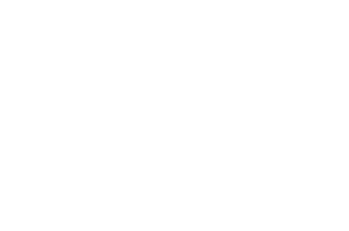

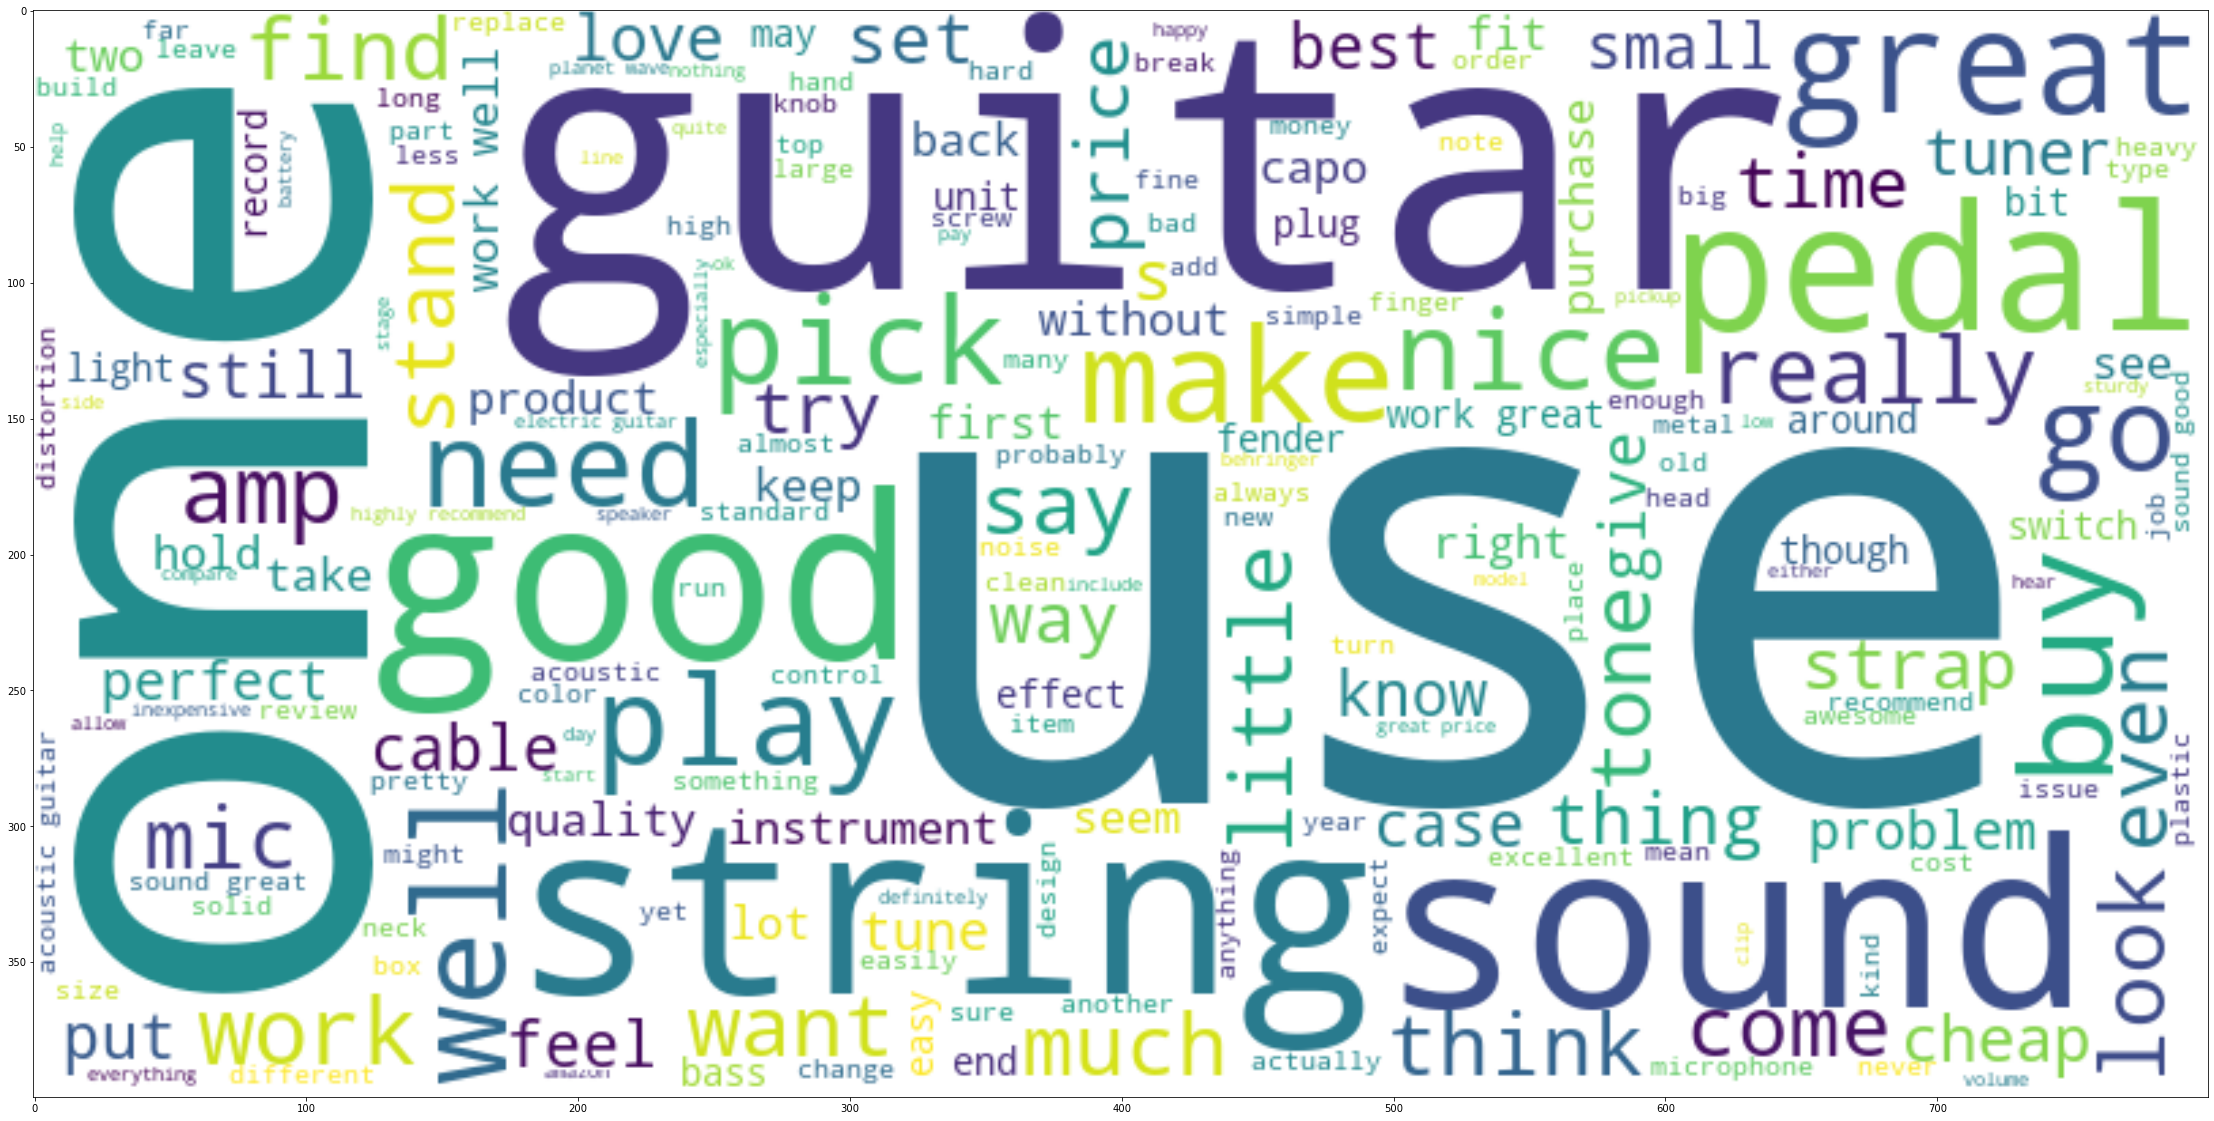

In [88]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:

plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [91]:
good_df = dataframe[dataframe['Rating']== 'good']
bad_df = dataframe[dataframe['Rating']== 'bad']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419 entries, 15 to 9084
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   reviewerID         419 non-null    object        
 1   asin               419 non-null    object        
 2   helpful            419 non-null    object        
 3   overall            419 non-null    int64         
 4   unixReviewTime     419 non-null    int64         
 5   title              419 non-null    object        
 6   price              419 non-null    float64       
 7   imUrl              419 non-null    object        
 8   categories         419 non-null    object        
 9   brand              419 non-null    object        
 10  Full Review        419 non-null    object        
 11  Rating             419 non-null    object        
 12  time               419 non-null    datetime64[ns]
 13  contracted         419 non-null    object        
 14  Full_Rev

In [95]:
goodtext = " ".join(review for review in good_df.lemma_str.astype(str))
print ("There are {} words in the combination of all cells in good_df column lemma_str.".format(len(goodtext)))
badtext = " ".join(review for review in bad_df.lemma_str.astype(str))
print ("There are {} words in the combination of all cells in bad_df column lemma_str.".format(len(badtext)))

There are 2646069 words in the combination of all cells in good_df column lemma_str.
There are 150502 words in the combination of all cells in bad_df column lemma_str.


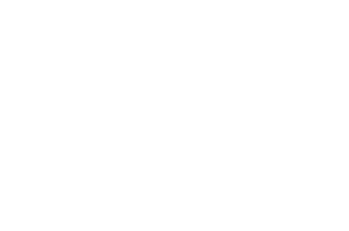

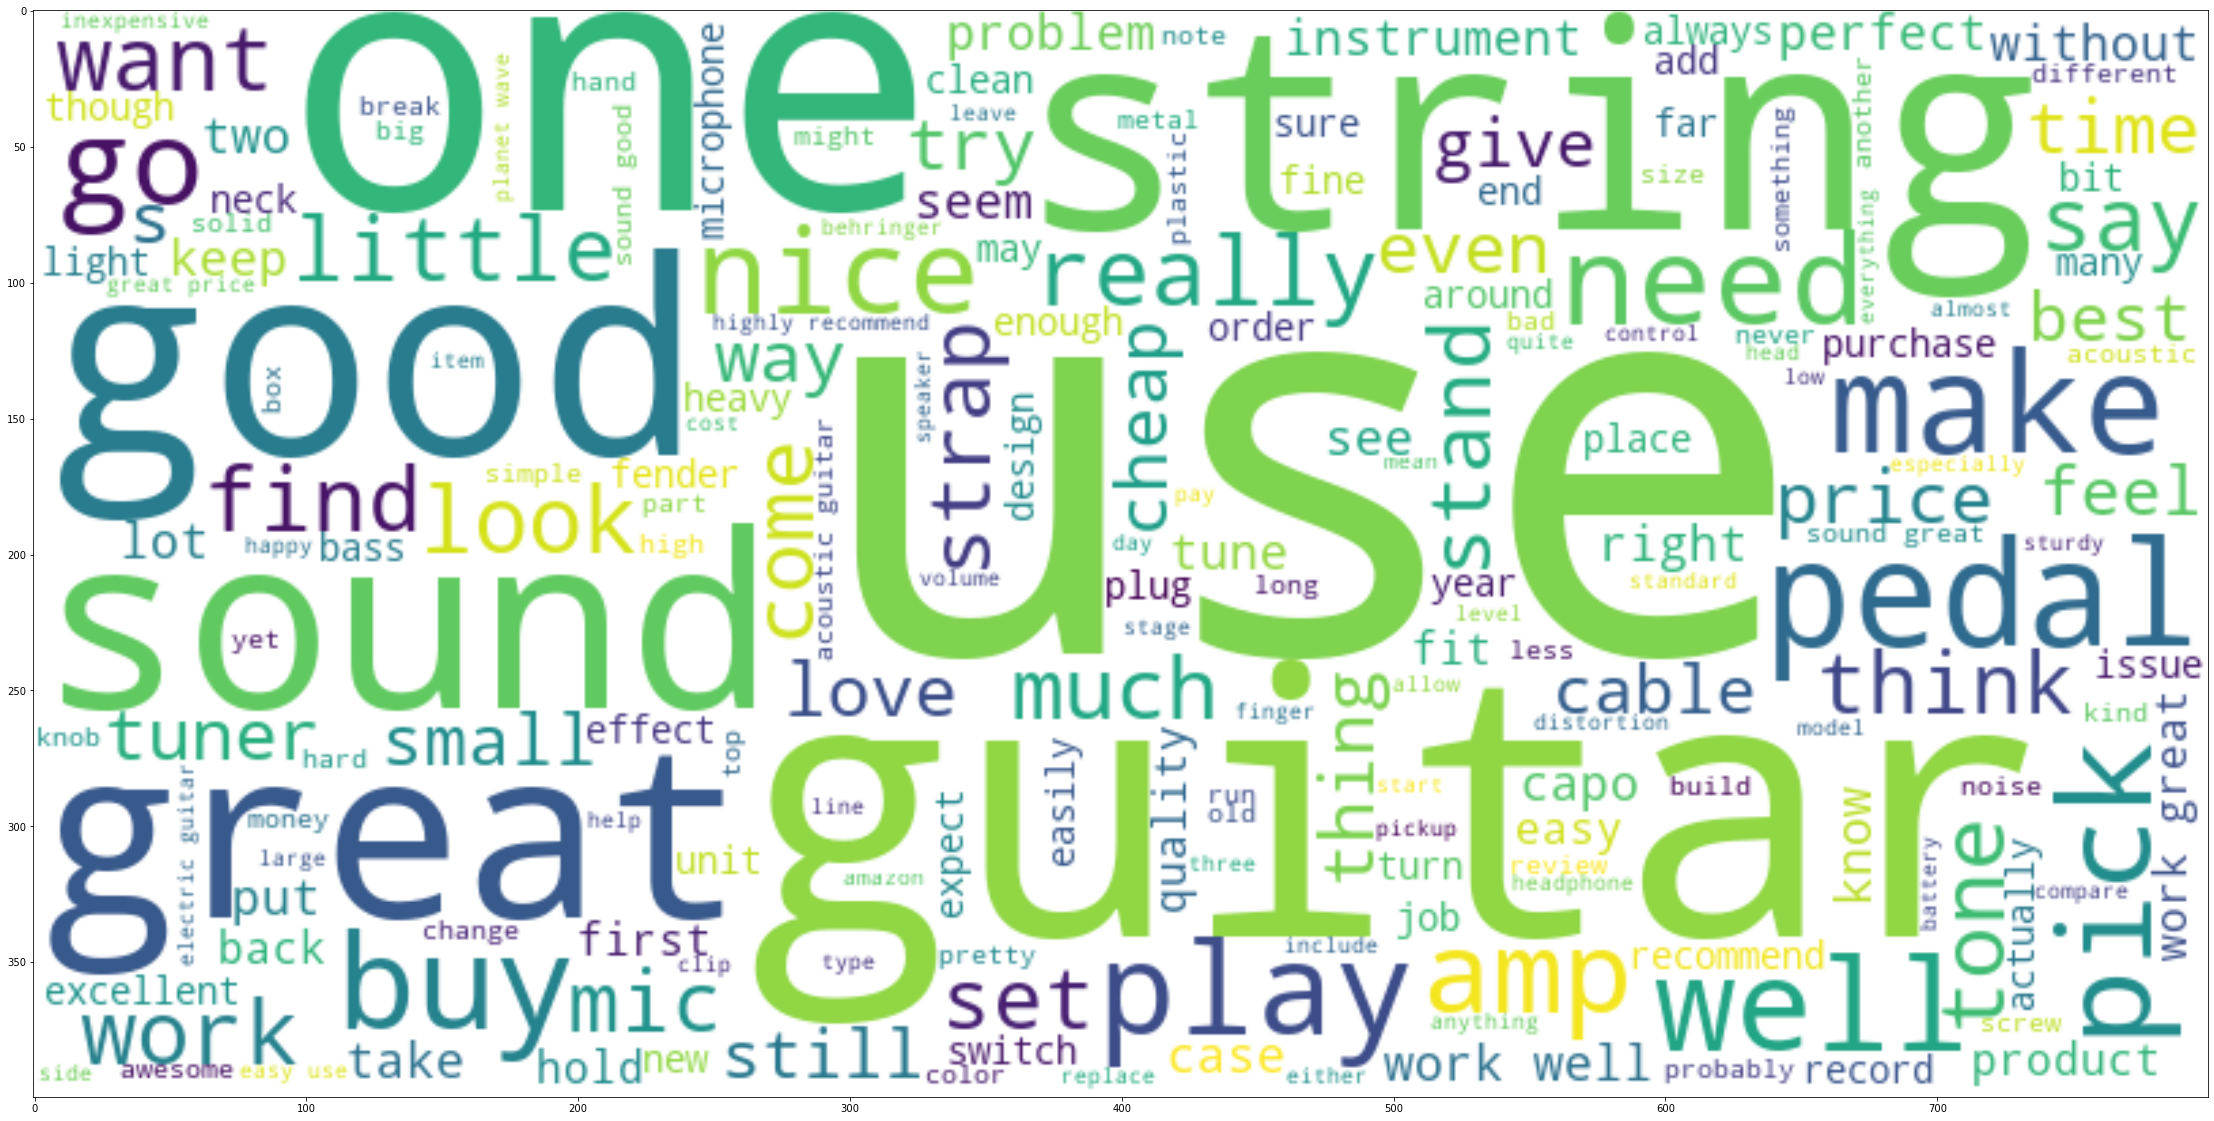

In [96]:
#cloud for good reviews 
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(goodtext)

# Display the generated image:
# the matplotlib way:

plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

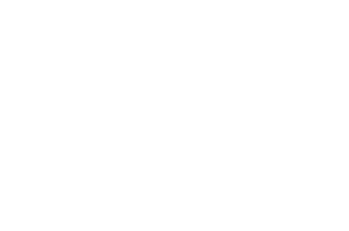

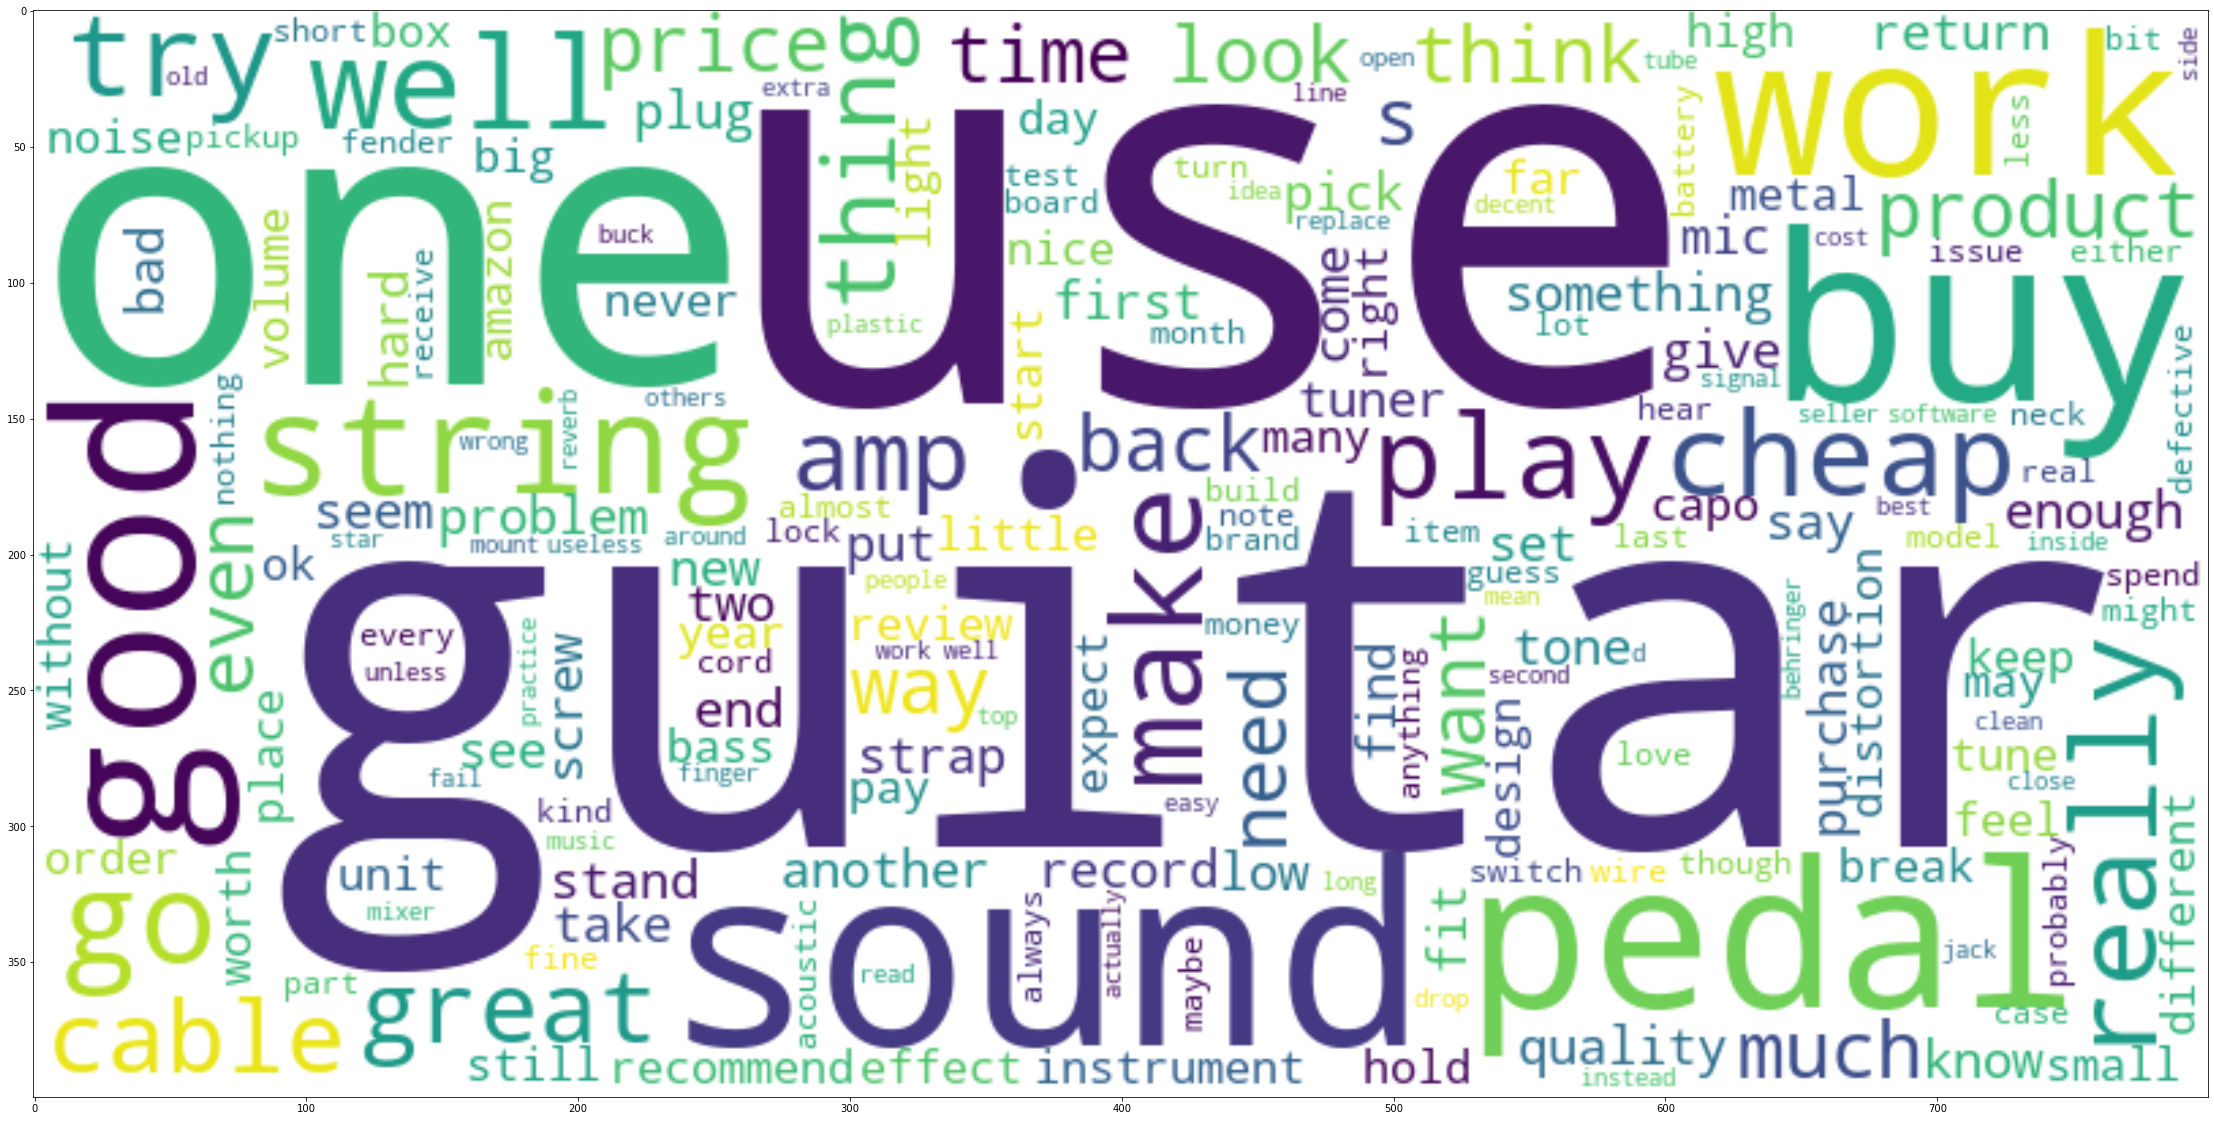

In [97]:
#cloud for bad reviews 
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(badtext)

# Display the generated image:
# the matplotlib way:

plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()